# Learning Theory Homework 
***
**Name**: Akshit Arora
***

This assignment is due on Moodle by **5pm on Friday March 9th**. Submit only this Jupyter notebook to Moodle. Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/CSCI5622-Machine-Learning/blob/master/resources/syllabus.md#collaboration-policy)



## Overview 
***

In this assignment you will explore the concepts of PAC learnability and VC dimension. 


### [15 points] Problem 1: 
***

Consider the class C of concepts defined by triangles with **distinct** vertices of the form $(i, j)$ where $i$ and $j$ are integers in the interval $[0,99]$. A concept c labels points on the interior and boundary of the associated triangle as positive and points exterior to the triangle as negative.

**Note**: To make life easier, we'll allow degenerate triangles in $C$. That is, triangles where the vertices are collinear. The following image depicts an example of a nondegenerate and a degenerate triangle.

<img src="figs/triangles.png" width=400 height=50>  

**Part A**: Suppose we have an algorithm that produces a consistent $h$ from the hypothesis class $H = C$. Give a bound on the number of training examples sufficient to assure that for any target concept $c$ in $C$, our algorithm will, with probability $1-\delta$, output a hypothesis $h$ with generalization error at most $\epsilon$.

**Answer**: Let number of training examples be 'm'. The bound on the number of training examples sufficient enough to assure that for any target concept c in C our algorithm will, with probability 1- $\delta$, output a hypothesis h with generalization error atmost $\epsilon$  can be given as:  <br><br>
$$
m >= \frac{1}{\epsilon}\ln\frac{|H|}{\delta}
$$

Since both x and y coordinates can have value from [0,99] => $|H|$ (cardinality of hypothesis set) is equal to <sup>100*100</sup>C<sub>3</sub>

**Part B**: Based on your bound in **Part A**, determine the minimum number of training examples necessary such that for any target concept $c$ in $C$, our algorithm will, with probability $0.95$, output a hypothesis $h$ with generalization error at most $0.15$.  

**Answer**: Let 'm' be the number of training examples. Using the formula in Part A:
$$
m >= \frac{1}{0.15}(\ln{|H|}+\ln{\frac{1}{0.95}})
$$

Putting ln(|H|) = ln(<sup>100*100</sup>C<sub>3</sub>) = 25.839

$$
m >= \frac{1}{0.15}(25.839+\ln{\frac{1}{0.95}}) \\
m >= \frac{(25.839+2.996)}{0.15} \\
m >= 192.23
$$

Therefore the minimum number of training examples necessary is **193**.

### [15 points] Problem 2: 
***

Consider feature vectors that live in two-dimensional space and the class of hypotheses defined by circles **centered at the origin**. There are two different kinds of hypotheses $h$ in this class. One type of hypthesis classifies points as positive if they lie on the boundary or **interior** of the circle, and negative otherwise. The other type of hypothesis classifies points as positive if they lie on the boundary or **exterior** of the circle, and negative otherwise. State and prove (rigorously) the VC dimension of this family of classifiers.

**Answer**: Let distance of the point from the center be 'd' and radius of the circle be 'r'. There are two different kinds of hypothesis in this class such that:
$$
H1 = 0\: if\: d > r\\
H1 = 1\: if\: d <= r\\
H2 = 1\: if\: d >= r\\
H2 = 0\: if\: d < r\\
$$


Let's calculate the lower bound first. I will be plotting all possible configuration of two training points and show that they can be shattered by either H1 or H2.

Assume red point indicates negative label and blue point indicates positive label


Text(0.5,1,'H2 classifies correctly')

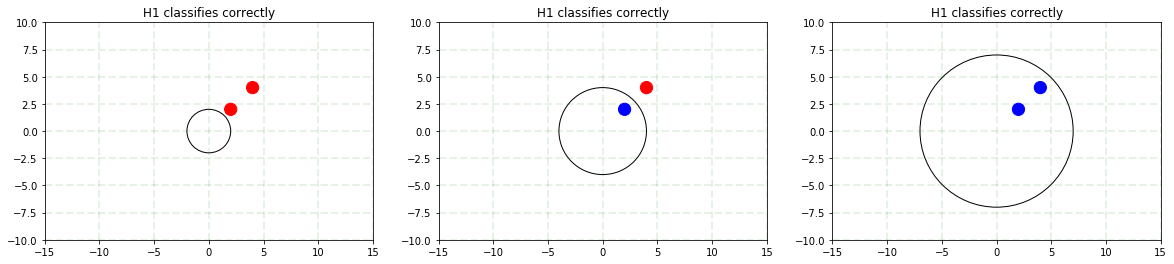

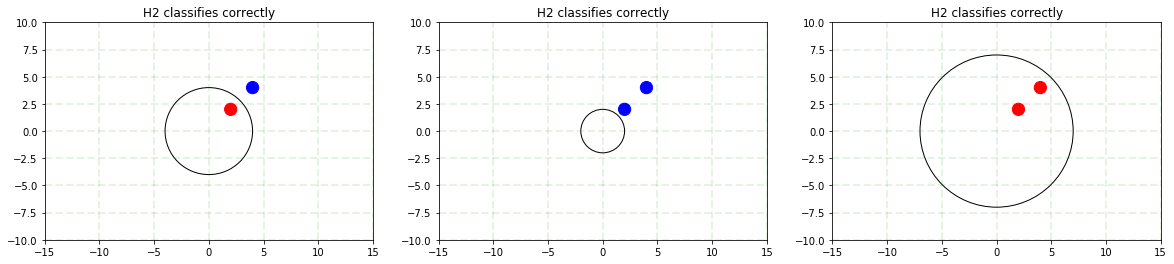

In [193]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
print("Assume red point indicates negative label and blue point indicates positive label")
axes[0].grid(color='g', linestyle='--', linewidth=2,alpha=0.1)
axes[0].add_patch(plt.Circle((0, 0), 2, fill=False))
axes[0].set_xlim([-15, 15])
axes[0].set_ylim([-10, 10])
axes[0].scatter([2,4], [2,4], color=['red','red'], s=150, zorder=2)
axes[0].set_title("H1 classifies correctly")

axes[1].grid(color='g', linestyle='--', linewidth=2,alpha=0.1)
axes[1].add_patch(plt.Circle((0, 0), 4, fill=False))
axes[1].set_xlim([-15, 15])
axes[1].set_ylim([-10, 10])
axes[1].scatter([2,4], [2,4], color=['blue','red'], s=150, zorder=2)
axes[1].set_title("H1 classifies correctly")

axes[2].grid(color='g', linestyle='--', linewidth=2,alpha=0.1)
axes[2].add_patch(plt.Circle((0, 0), 7,fill=False))
axes[2].set_xlim([-15, 15])
axes[2].set_ylim([-10, 10])
axes[2].scatter([2,4], [2,4], color=['blue','blue'], s=150, zorder=2)
axes[2].set_title("H1 classifies correctly")


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,4))

axes[0].grid(color='g', linestyle='--', linewidth=2,alpha=0.1)
axes[0].add_patch(plt.Circle((0, 0), 4, fill=False))
axes[0].set_xlim([-15, 15])
axes[0].set_ylim([-10, 10])
axes[0].scatter([2,4], [2,4], color=['red','blue'], s=150, zorder=2)
axes[0].set_title("H2 classifies correctly")


axes[2].grid(color='g', linestyle='--', linewidth=2,alpha=0.1)
axes[2].add_patch(plt.Circle((0, 0), 7,fill=False))
axes[2].set_xlim([-15, 15])
axes[2].set_ylim([-10, 10])
axes[2].set_title("H2 classifies correctly")
axes[2].scatter([2,4], [2,4], color=['red','red'], s=150, zorder=2)

axes[1].grid(color='g', linestyle='--', linewidth=2,alpha=0.1)
axes[1].add_patch(plt.Circle((0, 0), 2, fill=False))
axes[1].set_xlim([-15, 15])
axes[1].set_ylim([-10, 10])
axes[1].scatter([2,4], [2,4], color=['blue','blue'], s=150, zorder=2)
axes[1].set_title("H2 classifies correctly")

Therefore, the lower bound of the hypothesis is 2.

<br>
*Upper Bound*
<br>
- We want to prove that for S such that $|S|= 3$  , there exist a configuration of 3 points that S cannot be captured by the hypothesis.
- let us consider the hypothesis H1 (that is **y = h(r) = 1 if r ≤ d and 0 otherwise**).
- Let r1,r2 and r3 be three arbitrary points s.t. r1<=r2<=r3 (without loss of generality)
- Let y = (+1,-1,+1) and assume the above hypothesis works.
- since y1 = +1 , we must have r1<d
- since y3 = +1 , we must have r3<d
- Any point that lies within r3 should be classified as +1.
- We have r1<=r2<=r3<=d.So, y2 = −1 which is a contradiction.
- The same thing can  be proved considering the other hypothesis * y = h(r) = 1 if r ≥ d and −1 otherwise* is insufficient to handle 3 points.
- Thus, no collection of 3 points can be shattered. 

**Hence, VC dimension of origin centered circle (H1 and H2 separately) is 2**

H1 and H2 have a VC dimension of 2.<br>
Final VC dimension will be a union of the above two sets. To find union:
$$
VC(H1 \cup H2) <= VC(H1) + VC(H2) + 1\\
=>\: VC(H1 \cup H2) = 5
$$
Therefore VC dimension is **5** when we take H1 and H2 combined.

### [20 points] Problem 3: Empirical Verification of PAC Bounds for Axis-Aligned Rectangles 
***

In the in-class notebook associated with PAC Learnability, we proved a PAC bound for the class of concepts $C$ comprised of axis-aligned rectangles living in $\mathbb{R}^2$ of the form $(a \leq x \leq b) \wedge (c \leq y \leq d)$ where $a, b, c, d$ are real numbers. Specifically, we proved that with probability $1-\delta$, any consistent learner could learn a hypothesis $h$ in $H = C$ with generalization error less than $\epsilon$ provided that the number of training examples satisfied 

$$
m > \frac{4}{\epsilon}\log\frac{4}{\delta}
$$

In this problem you will empirically verify this bound for the restricted concept class $C$ where the rectangles are defined by $(a \leq x \leq b) \wedge (c \leq y \leq d)$ where $a, b, c, d$ are real numbers satisfying $0 \leq a \leq b \leq 100$ and $0 \leq c \leq d \leq 100$. 

**Part A**: The following is a general outline of how you should accomplish this, but it is up to you how you organize your code. 

- Write some code that randomly generates a concept rectangle $c$. 



- Write some code that, given feature vectors of length-2, labels them according to some rectangle (that is, labels a point positive if the point is on the boundary or interior of the rectangle, and negative otherwise).  



- Write some code that, given training examples of length-2, and labeled according to a concept $c$, returns a consistent hypothesis rectangle $h$. 



- Write some code that generates a training set of size $m$, labels them according to a random concept $c$, learns a consistent hypothesis $h$, and then approximates the generalization error by predicting on $1000$ new examples from the same distribution as the training data. 


- Write some code that computes approximate generalization errors for $100$ independent concepts $c$ and associated training sets of size $m$, and returns the worst-case generalization error at the confidence level $1-\delta$.  One way to do this in the case that say $\delta = 0.05$, is to report the $95^\textrm{th}$ percentile of the $100$ samples of the generalization error. We can then say that, in our simulation, $100(1-\delta)\%$ of our observed generalization errors were less than our computed value. (**Bonus**: If your code is efficient, try increasing the number of runs in the simulation to $500$. This should give you a better approximation of the generalization error.) 

In [242]:
#Write some code that randomly generates a concept rectangle  c .
import numpy as np
def generate_concept():
    dict1 = {}
    dict1['a'] = np.random.uniform(0,100) #x1
    dict1['b'] = np.random.uniform(dict1['a']+1,101) #x2
    dict1['c'] = np.random.uniform(0,100) #y1
    dict1['d'] = np.random.uniform(dict1['c']+1,101) #y2
    return dict1

In [243]:
#Write some code that, given feature vectors of length-2, labels them according to some rectangle (that is, labels a point positive if the point is on the boundary or interior of the rectangle, and negative otherwise).

def model(dict1,point):
    '''
    params:
        dict1: the dictionary of values that define the concept. In this case: a, b, c and d
        point: [x,y] coordinates of the point (feature vector)
    '''
    if(point[0] > dict1['b'] or point[0] < dict1['a'] or point[1] < dict1['c'] or point[1] > dict1['d']):
        return 'negative'
    else:
        return 'positive'

In [244]:
#Write some code that, given training examples of length-2, and labeled according to a concept  c , returns a consistent hypothesis rectangle  h.

def generate_hyp(examples):
    '''
    params:
        point: [x,y,label] where x,y are coordinates of point and label is according to concept c
    '''
    positive_x = []
    negative_x = []
    positive_y = []
    negative_y = []
    for i in examples:
        if(i[2] == 'positive'):
            positive_x.append(i[0])            
            positive_y.append(i[1])
        elif(i[2] == 'negative'):
            negative_x.append(i[0])            
            negative_y.append(i[1])
            
    lower_limit_a = min(positive_x)
    upper_limit_b = max(positive_x)
    for i in negative_x:
        if(i > lower_limit_a and i < min(positive_x)):
            lower_limit_a = i
        if(i < upper_limit_b and i > max(positive_x)):
            upper_limit_b = i
    lower_limit_c = min(positive_y)
    upper_limit_d = max(positive_y)
    for i in negative_y:
        if(i > lower_limit_c and i < min(positive_y)):
            lower_limit_c = i
        if(i < upper_limit_b and i > max(positive_y)):
            upper_limit_d = i
    #h = {'a':random.uniform(lower_limit_a,min(positive_x)+1), 'b':random.uniform(max(positive_x),upper_limit_b), 'c':random.uniform(lower_limit_c,min(positive_y)+1), 'd':random.uniform(max(positive_y),upper_limit_d)}
    h = {'a':min(positive_x), 'b':max(positive_x), 'c':min(positive_y)+1, 'd':max(positive_y)}
    return h

In [117]:
#Write some code that generates a training set of size  m , labels them according to a random concept  c , learns a consistent hypothesis  h , and then approximates the generalization error by predicting on  1000  new examples from the same distribution as the training data.
import random
def gen_error(m,distribution = 'uniform', mean = 0.0, sd = 0.0):
    training_set = []
    c = generate_concept() #generating random concept
    for i in range(m-1):
        vec = []
        if(distribution == 'uniform'):
            x = np.random.uniform(0,101)
            y = np.random.uniform(0,101)
        elif(distribution == 'normal'):
            x = np.random.normal(mean,sd)
            y = np.random.normal(mean,sd)
        label = model(c,[x,y])
        vec.append(x) #x coordinate
        vec.append(y) #y coordinate
        vec.append(label) #label according to concept c
        training_set.append(vec)
    pos_vec = []
    x = np.random.uniform(c['a'],c['b']-1)
    y = np.random.uniform(c['c'],c['d']-1)
    label = model(c,[x,y])
    pos_vec.append(x) #x coordinate
    pos_vec.append(y) #y coordinate
    pos_vec.append(label) #label according to concept c
    training_set.append(pos_vec) #to avoid the problem of no positive example while learning hypothesis
    h = generate_hyp(training_set) #"learns" a consistent hypothesis
    test_set = [] #1000 new examples from the same distribution as training data
    error = 0
    for i in range(1000):
        vec = []
        if(distribution == 'uniform'):
            x = np.random.uniform(0,101)
            y = np.random.uniform(0,101)
        elif(distribution == 'normal'):
            x = np.random.normal(mean,sd)
            y = np.random.normal(mean,sd)
        vec.append(x) #x coordinate
        vec.append(y) #y coordinate
        test_set.append(vec)
        if(model(h,[x,y]) != model(c,[x,y])):
            error += 1
    error = error / 1000
    return error

In [220]:
#Write some code that computes approximate generalization errors for  100  independent concepts  c  and associated training sets of size  m , and returns the worst-case generalization error at the confidence level  1−δ . One way to do this in the case that say  δ=0.05 , is to report the  95th  percentile of the  100 samples of the generalization error. We can then say that, in our simulation,  100(1−δ)%  of our observed generalization errors were less than our computed value. (Bonus: If your code is efficient, try increasing the number of runs in the simulation to  500 . This should give you a better approximation of the generalization error.)

def approximate_gen_error(n,m,distribution = 'uniform',mean=0,sd=0): #n = number of runs in the simulation
    errors = []
    for i in range(n): 
        if(distribution == 'uniform'):
            errors.append(gen_error(m))
        elif(distribution == 'normal'):
            errors.append(gen_error(m,distribution,mean,sd))
    return errors

In [84]:
#lets run it 100 times
simulation1 = approximate_gen_error(100,5000)

In [85]:
# print("Top 5 errors:")
# for i in np.argsort(simulation1)[-5:]:
#     print(simulation1[i])
    
print("95% of our observed errors were less than "+str(simulation1[np.argsort(simulation1)[-5]]) + " with number of samples of generalization error were 100")

95% of our observed errors were less than 0.036 with number of samples of generalization error were 100


In [89]:
#lets run it 500 times
simulation2 = approximate_gen_error(500,5000)

In [91]:
# for i in np.argsort(simulation2)[int(-0.05 * len(simulation2)):]:
#     print(simulation2[i])
    
print("95% of our observed errors were less than "+str(simulation2[np.argsort(simulation2)[int(-0.05 * len(simulation2))]]) + " with number of samples of generalization error were 500")

95% of our observed errors were less than 0.044 with number of samples of generalization error were 500


**Part B**: Use your code to estimate the generalization error with confidence parameter $\delta=0.05$ for training sets of size $m$ where $m = 250, 500, 1000, 1250,$ and $1500$ and the data are comprised of points $(x,y)$ where the $x$- and $y$-values are sampled from the continuous uniform distribution $\textrm{unif}(0,100)$. Make a **log-log** plot with $m$ on the horizontal axes and $\epsilon$ on the vertical axis.  Additionally, overlay the theoretical PAC bound on your graph and discuss your results. 

In [255]:
import matplotlib.pyplot as plt

def calc_pac(m_,delta):
    return 4.0/m * np.log(4.0/delta)

try_m = [250,500,1000,1250,1500]
error = []
pac = []
for m in try_m:
    print("m = "+str(m))
    simulation3 = approximate_gen_error(100,m)
    print("95% of our observed errors were less than "+str(simulation3[np.argsort(simulation3)[int(-0.05 * len(simulation2))]]) + " with number of samples of generalization error were 100")
    error.append(simulation3[np.argsort(simulation3)[int(-0.05 * len(simulation2))]])
    pac.append(calc_pac(m,0.05))

m = 250
95% of our observed errors were less than 0.015 with number of samples of generalization error were 100
m = 500
95% of our observed errors were less than 0.013 with number of samples of generalization error were 100
m = 1000
95% of our observed errors were less than 0.008 with number of samples of generalization error were 100
m = 1250
95% of our observed errors were less than 0.008 with number of samples of generalization error were 100
m = 1500
95% of our observed errors were less than 0.007 with number of samples of generalization error were 100


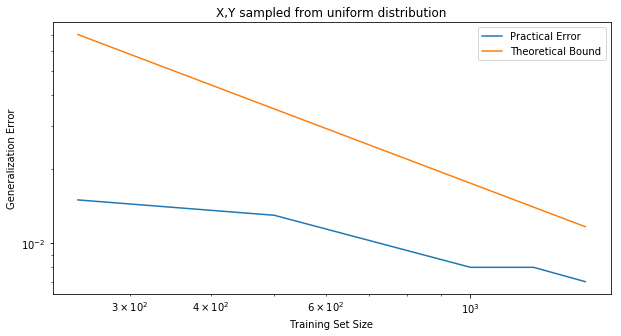

In [256]:
plt.figure(figsize=(10,5))
plt.loglog(try_m,error,label='Practical Error')
plt.title('X,Y sampled from uniform distribution')
plt.xlabel('Training Set Size')
plt.ylabel('Generalization Error')
plt.loglog(try_m,pac,label='Theoretical Bound')
plt.legend()

**Part C**: Repeat **Part B** where the data are comprised of points $(x,y)$ where the $x$- and $y$-values are sampled from the normal distribution with mean $\mu = 50$ and standard deviation $\sigma = 25$. Again, overlay the theoretical PAC bound on your graph and discuss your results. Do you expect to observe very different results than those observed in **Part B**?  

In [253]:
import matplotlib.pyplot as plt

def calc_pac(m_,delta):
    return 4.0/m * np.log(4.0/delta)

try_m = [250,500,1000,1250,1500]
error = []
pac = []
for m in try_m:
    print("m = "+str(m))
    simulation3 = approximate_gen_error(100,m,distribution='normal',mean=50,sd=25)
    print("95% of our observed errors were less than "+str(simulation3[np.argsort(simulation3)[int(-0.05 * len(simulation2))]]) + " with number of samples of generalization error were 100")
    error.append(simulation3[np.argsort(simulation3)[int(-0.05 * len(simulation2))]])
    pac.append(calc_pac(m,0.05))

m = 250
95% of our observed errors were less than 0.019 with number of samples of generalization error were 100
m = 500
95% of our observed errors were less than 0.011 with number of samples of generalization error were 100
m = 1000
95% of our observed errors were less than 0.008 with number of samples of generalization error were 100
m = 1250
95% of our observed errors were less than 0.007 with number of samples of generalization error were 100
m = 1500
95% of our observed errors were less than 0.008 with number of samples of generalization error were 100


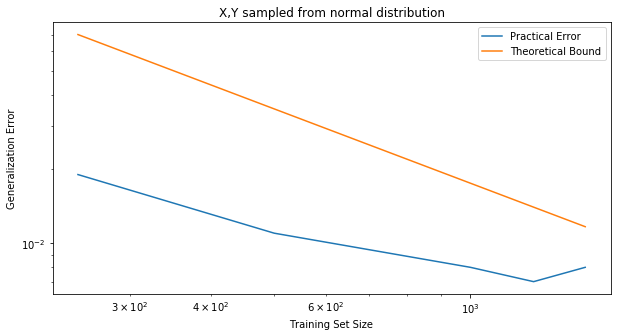

In [254]:
plt.figure(figsize=(10,5))
plt.loglog(try_m,error,label='Practical Error')
plt.title('X,Y sampled from normal distribution')
plt.xlabel('Training Set Size')
plt.ylabel('Generalization Error')
plt.loglog(try_m,pac,label='Theoretical Bound')
plt.legend()

- Above are runs for 100 epochs.
- Normal Distribution will sample more points (68% of points vs 50% in case of Uniform) between the values 25-75.
- What we expect is that if concepts lie within this range, the error should be less.
- However, if the concept class is found, that is not within the specified range, the generalization error will increase.
- Since we are doing multiple epochs for this, it gets balanced out.
- Another point we notice is that in case of Uniform distribution, 100% of the values lie between 0-100. But in Normal distribution 95% of the values lie between 0-100. Therefore the distribution difference is not very large. Which again justifies the reason for similar curves.
- Given enough examples, i.e. m the theoretical and practical erros will converge.